In [2]:
import networkx as nx
import numpy as np
import numpy as np
import numpy.linalg as la
import numpy.random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# Probability & Markov processes

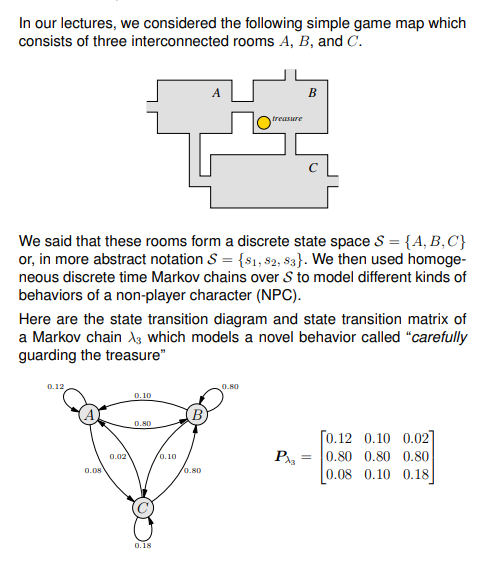

In [3]:
################################################# PROBLEM 1 ####################################################################

matP = np.array(
[[0.12, 0.10, 0.02],
[0.80, 0.80, 0.80],
[0.08, 0.10, 0.18]])

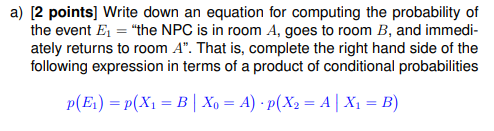

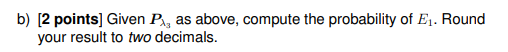

In [6]:
### SOLUTION to b)
np.round(matP[1][0]*matP[0][1],2)

0.08

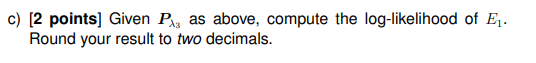

In [7]:
# SOLUTION to c)

np.round(np.log(matP[1,0]) + np.log(matP[0,1]),2)

-2.53

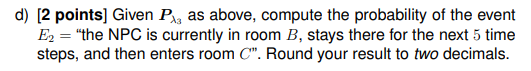

In [10]:
# 1 D 
# E2 = B'BBBBB - 5'C

print("probability BBBBBBC",np.round((matP[1][1]**tau)*(matP[2][1]),2) )

probability BBBBBBC 0.03


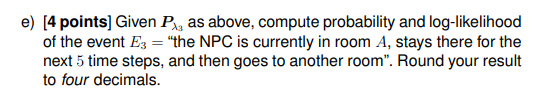

In [9]:
#1 E3 = A, tau = 5 , C

tau = 5
print("probability AAAAAA(!A): ", np.round((matP[0][0]**tau)*(1-matP[0][0]),4))


print("likelihood: " ,np.round(tau*np.log(matP[0,0])+np.log(1 - matP[0,0]),4))

probability AAAAAA(!A):  0.0
likelihood:  -10.7292


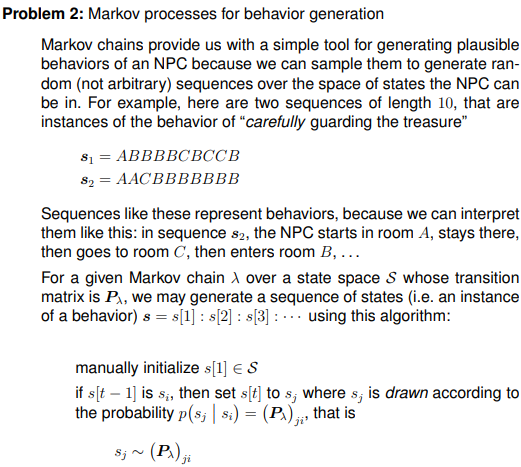

In [ ]:
###################################################### PROBLEM 2 ################################################################

In [180]:
matP = np.array(
[[0.12, 0.10, 0.02],
[0.80, 0.80, 0.80],
[0.08, 0.10, 0.18]])

states = ['A', 'B', 'C']
indices = range(len(states))
state2index = dict(zip(states, indices))
index2state = dict(zip(indices, states))

In [181]:
def generateStateSequence(s, P, tau):
    sseq = [s]
    iold = state2index[s]
    for t in range(tau):
        inew = rnd.choice(indices, p=P[:,iold])
        sseq.append(index2state[inew])
        iold = inew
    return sseq

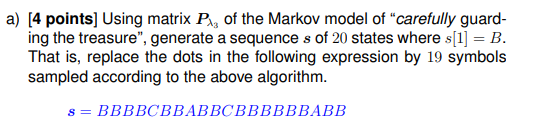

In [182]:
####################################### 2. 1

sseq = generateStateSequence('B',matP,19)
sseq
print (''.join(sseq))

BCBBBBAABABABBBBBBAC


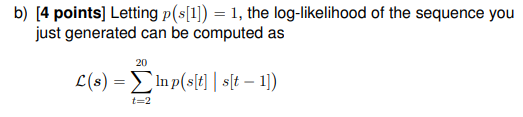

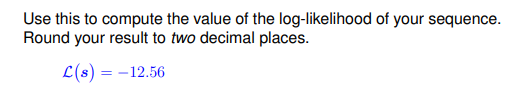


In [183]:
###################################### 2. 2
iseq = [state2index[s] for s in sseq]
tmax = len(iseq)
    
like1 = np.sum([ np.log(matP[iseq[t],iseq[t-1]]) for t in range(1,tmax) ])
print(np.round(like1,2))

-18.84


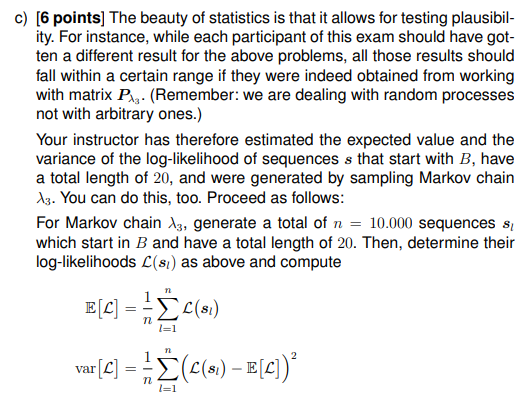

In [116]:
###################################### 2.3   ####### IMPLEMENT TOGETHER

# Expectation

sum = 0
for i in range(10000):
    sseq = generateStateSequence('B',matP,19)
    iseq = [state2index[s] for s in sseq]
    tmax = len(iseq)
    
    like1 = np.sum([ np.log(matP[iseq[t],iseq[t-1]]) for t in range(1,tmax) ])
    sum = sum + like1

expec = sum/10000
print("expectation :", np.round(expec))

varsum = 0

for i in range(10000):
    sseq = generateStateSequence('B',matP,19)
    iseq = [state2index[s] for s in sseq]
    tmax = len(iseq)
    
    like1 = np.sum([ np.log(matP[iseq[t],iseq[t-1]]) for t in range(1,tmax) ])
    varsum = varsum + (like1 - expec)**2

var = varsum/10000
print("variance:",np.round(var,2))

expectation : -12.0
variance: 13.0


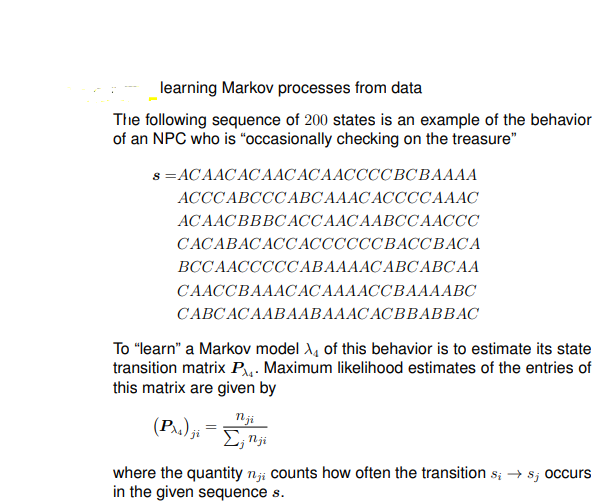

In [ ]:
###################################################### PROBLEM 3 ################################################################

In [138]:
data = "ACAACACAACACAACCCCBCBAAAAACCCABCCCABCAAACACCCCAAACACAACBBBCACCAACAABCCAACCCCACABACACCACCCCCCBACCBACABCCAACCCCCABAAAACABCABCAACAACCBAAACACAAAACCBAAAABCCABCACAABAABAAACACBBABBAC"

In [148]:
####################################### 3 a)

sseq = list(data)
states = ['A', 'B', 'C']
indices = range(len(states))
state2index = dict(zip(states, indices))
index2state = dict(zip(indices, states))
iseq = [state2index[s] for s in sseq]

def estimateStateTransitions(indices, iseq):
    m = len(indices)
    P = np.zeros((m,m))
    for t in range(1, len(iseq)):
        P[iseq[t],iseq[t-1]] += 1.
    return P / np.sum(P, axis=0)

Pest = estimateStateTransitions(indices, iseq)
print(np.round(Pest,2))
print(Pest)
print(np.sum(Pest,axis = 0))

[[0.42 0.44 0.46]
 [0.17 0.16 0.11]
 [0.41 0.4  0.42]]
[[0.42307692 0.44       0.46478873]
 [0.16666667 0.16       0.11267606]
 [0.41025641 0.4        0.42253521]]
[1. 1. 1.]


In [140]:
###################################### 3 b)

iseq = [state2index[s] for s in data]
tmax = len(iseq)
    
like1 = np.sum([ np.log(Pest[iseq[t],iseq[t-1]]) for t in range(1,tmax) ])
print(np.round(like1))

-385.0


In [ ]:
###################################################### PROBLEM 4 ################################################################

In [167]:
mat3 = np.array(
[[0.12, 0.10, 0.02],
[0.80, 0.80, 0.80],
[0.08, 0.10, 0.18]])

mat4 = np.array([[0.42, 0.44, 0.46],
 [0.17, 0.16, 0.11],
 [0.41, 0.4,  0.42]])

In [160]:
matP = mat3
m = matP.shape[0]
vecB = np.hstack((np.zeros(m), 1))
matI = np.eye(m)
matA = np.vstack((matI-matP, np.ones(m)))
vecPI = la.lstsq(matA, vecB)[0]
print("mat3 vecPI ",np.round(vecPI,2),'\n')

mat3 vecPI  [0.09 0.8  0.11] 



C:\Users\rohil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [161]:
matP = mat4
m = matP.shape[0]
vecB = np.hstack((np.zeros(m), 1))
matI = np.eye(m)
matA = np.vstack((matI-matP, np.ones(m)))
vecPI = la.lstsq(matA, vecB)[0]
print("mat4 vecPI ",np.round(vecPI,2),'\n')

mat4 vecPI  [0.44 0.15 0.41] 



C:\Users\rohil\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [171]:
states = ['A', 'B', 'C']
indices = range(len(states))
state2index = dict(zip(states, indices))
index2state = dict(zip(indices, states))
def generateStateSequence(X0, P, tau):
    sseq = [X0]
    iold = state2index[X0]
    for t in range(tau):
        inew = rnd.choice(indices, p=P[:,iold])
        sseq.append(index2state[inew])
        iold = inew
    return sseq

sumA = 0
sumB = 0
sumC = 0

for i in range(10000):
    sequence = generateStateSequence('B', Pest, 20)
    if sequence[-1] == 'A':
        sumA = sumA + 1
    elif sequence[-1] == 'B':
        sumB = sumB + 1
    elif sequence[-1] == 'C':
        sumC = sumC + 1
    
print(sumA," ",sumB," ", sumC)

print("For lambda 3 room is B")
print("For lambda 4 room is A")

4418   1433   4149
For lambda 3 room is B


In [ ]:
###################################################### PROBLEM 8 ################################################################